In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import string
from matplotlib import gridspec

import time
import pickle

import memory_profiler

%load_ext memory_profiler

from pathlib import Path

In [2]:
mpl.__version__

'3.6.2'

In [3]:
import black
import jupyter_black

jupyter_black.load(line_length=79)

In [4]:
%load_ext autoreload
%autoreload 2

from pubmed_landscape_src.plotting import *

In [5]:
variables_path = Path("../../results/variables")
figures_path = Path("../../results/figures")
berenslab_data_path = Path("/gpfs01/berens/data/data/pubmed_processed")

In [6]:
plt.style.use("../matplotlib_style.txt")

# Fig S6: Distribution of abstract and title lengths across the biomedical literature

### Import

In [7]:
# import clean_df_updated
clean_df_updated_reparsed_filtered_with_authors_ISSN = pd.read_pickle(
    berenslab_data_path / "clean_df_updated_reparsed_filtered_with_authors_ISSN"
)

tcmalloc: large alloc 1073741824 bytes == 0x8c12da000 @ 
tcmalloc: large alloc 1233903616 bytes == 0x96b2f0000 @ 


In [8]:
all_abstracts = clean_df_updated_reparsed_filtered_with_authors_ISSN.AbstractText

In [9]:
all_titles = clean_df_updated_reparsed_filtered_with_authors_ISSN.Title

In [16]:
tsne_reparsed = np.load(variables_path / "tsne_reparsed.npy")

In [17]:
tsne_bert = np.vstack((-tsne_reparsed[:, 0], tsne_reparsed[:, 1])).T

### Calculation

In [10]:
%%time
len_abstracts = [len(x) for x in all_abstracts.tolist()]

CPU times: user 3.86 s, sys: 388 ms, total: 4.25 s
Wall time: 4.26 s


In [11]:
%%time
len_abstracts_cut_off = np.where(
    np.array(len_abstracts) > 1750, 1751, len_abstracts
)

CPU times: user 2.02 s, sys: 9.87 ms, total: 2.03 s
Wall time: 2.03 s


In [12]:
%%time
len_titles = [len(x) for x in all_titles.tolist()]

CPU times: user 2.15 s, sys: 9.78 ms, total: 2.16 s
Wall time: 2.16 s


In [13]:
len_titles = np.array(len_titles)

In [14]:
%%time
len_titles_cut_off = np.where(np.array(len_titles) > 125, 126, len_titles)
len_titles_cut_off = np.where(
    np.array(len_titles_cut_off) < 50, 49, len_titles_cut_off
)

CPU times: user 153 ms, sys: 123 µs, total: 153 ms
Wall time: 152 ms


### Plot

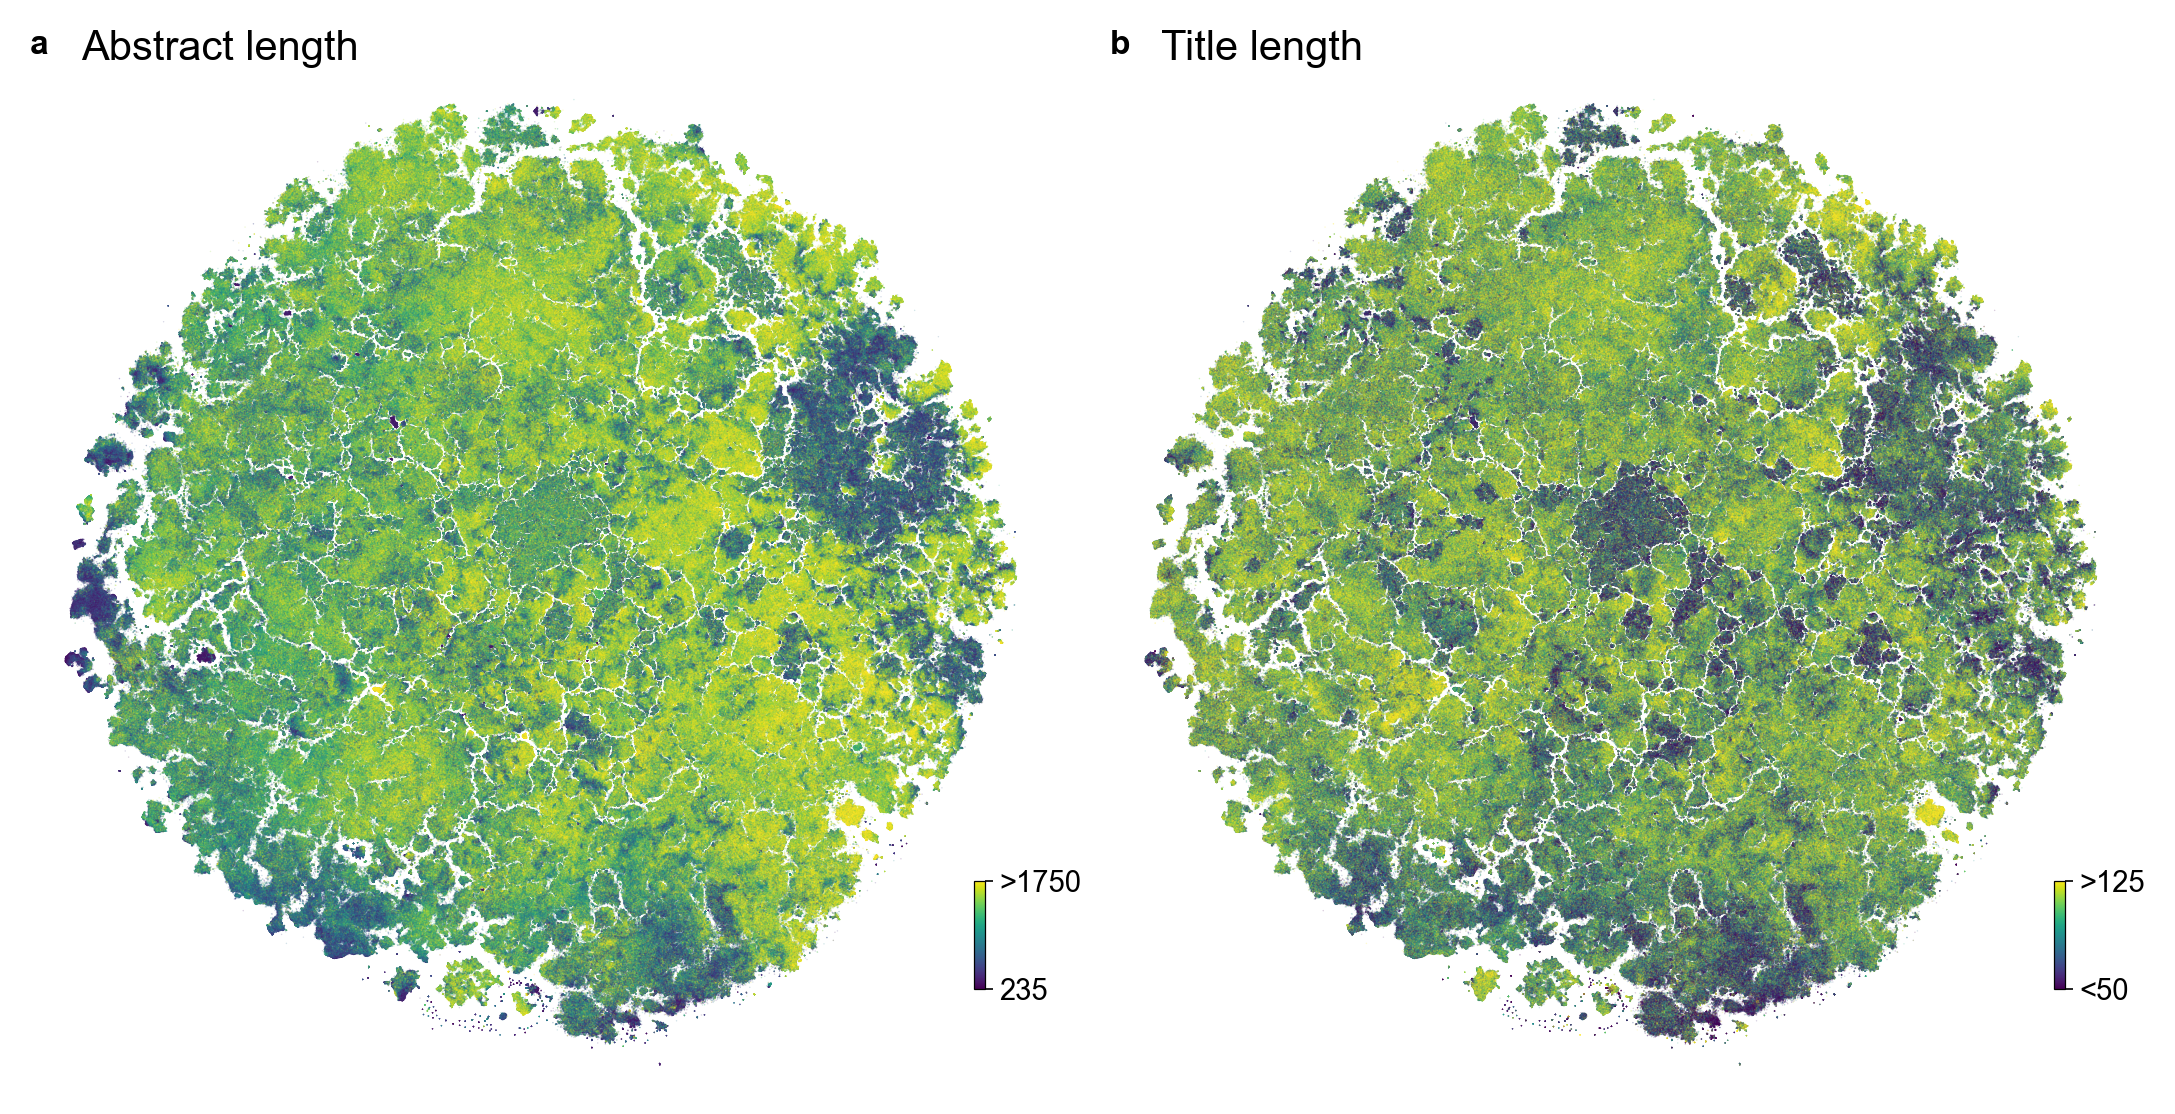

In [18]:
%matplotlib inline

fig, ax = plt.subplots(
    1, 2, figsize=(7.2, 3.6), dpi=300, sharey=True, layout="constrained"
)

txtkwargs = dict(size=8, weight="bold", va="top", ha="left")

x_lim = (-240, 240)
y_lim = (-240, 240)
tsne = tsne_bert

# subplot a
reorder = np.random.permutation(tsne.shape[0])
ax[0].scatter(
    tsne[reorder][:, 0],
    tsne[reorder][:, 1],
    s=0.5,
    c=len_abstracts_cut_off[reorder],
    cmap="viridis",
    alpha=0.2,
    marker=".",
    linewidths=None,
    ec="None",
    rasterized=True,
)

heatmap = ax[0].scatter([], [], c=[], cmap="viridis")
cax0 = fig.add_axes([0.45, 0.1, 0.005, 0.1])
cbar0 = fig.colorbar(heatmap, cax=cax0, shrink=0.1)
cbar0.set_alpha(1)
cbar0.ax.get_yaxis().set_ticks([0, 1])
cbar0.ax.get_yaxis().set_ticklabels([np.amin(len_abstracts), ">1750"])
cbar0.ax.tick_params(labelsize=7)

ax[0].text(
    0, 1.03, string.ascii_lowercase[0], transform=ax[0].transAxes, **txtkwargs
)
ax[0].text(
    0.05,
    1.03,
    "Abstract length",
    transform=ax[0].transAxes,
    va="top",
    ha="left",
)
ax[0].axis("scaled")
ax[0].set_xlim(x_lim[0], x_lim[1])
ax[0].set_ylim(y_lim[0], y_lim[1])
ax[0].axis("off")

# subplot b
ax[1].scatter(
    tsne[reorder][:, 0],
    tsne[reorder][:, 1],
    s=0.5,
    c=len_titles_cut_off[reorder],
    cmap="viridis",
    alpha=0.2,
    marker=".",
    linewidths=None,
    ec="None",
    rasterized=True,
)
heatmap = ax[1].scatter([], [], c=[], cmap="viridis")
cax1 = fig.add_axes([0.95, 0.1, 0.005, 0.1])
cbar1 = fig.colorbar(heatmap, cax=cax1, shrink=0.1)
cbar1.set_alpha(1)
cbar1.ax.get_yaxis().set_ticks([0, 1])
cbar1.ax.get_yaxis().set_ticklabels(["<50", ">125"])
cbar1.ax.tick_params(labelsize=7)

ax[1].text(
    0, 1.03, string.ascii_lowercase[1], transform=ax[1].transAxes, **txtkwargs
)
ax[1].text(
    0.05, 1.03, "Title length", transform=ax[1].transAxes, va="top", ha="left"
)
ax[1].axis("scaled")
ax[1].set_xlim(x_lim[0], x_lim[1])
ax[1].set_ylim(y_lim[0], y_lim[1])
ax[1].axis("off")

fig.savefig(figures_path / "fig_S7_bert_colored_by_length.pdf", dpi=300)
fig.savefig(figures_path / "fig_S7_bert_colored_by_length.png", dpi=300)